In [10]:
import zarr
import os
import matplotlib.pyplot as plt

In [4]:
ZARR_FOLDER = '../../../../data/cells/raw/zarr/'

In [5]:
files = os.listdir(ZARR_FOLDER)
files = [os.path.join(ZARR_FOLDER,f) for f in files ]
files

['../../../../data/cells/raw/zarr/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_1_ch_4.zarr',
 '../../../../data/cells/raw/zarr/ND8_DIV0+4h_20x_noConfinment_6_ch_4.zarr']

In [8]:
TEST_PATH = files[0]
zarr_file = zarr.open(TEST_PATH, mode='r')
zarr_file.info

Name,/
Type,zarr.hierarchy.Group
Read-only,True
Store type,zarr.storage.DirectoryStore
No. members,4
No. arrays,4
No. groups,0
Arrays,"ground_truth, mask, prediction, raw"


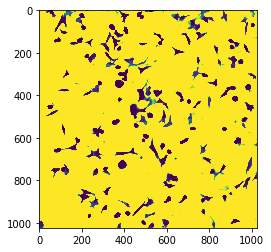

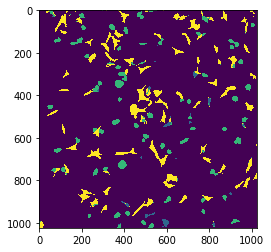

In [12]:
pred = root['prediction'][:]
plt.imshow(pred[:,:,0])
plt.show()
max_pred = pred.argmax(axis=2)
plt.imshow(max_pred)
plt.show()

(1024, 1024, 3)


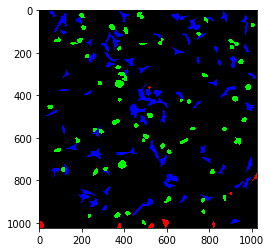

(1024, 1024)
Max masks: 169 165 166


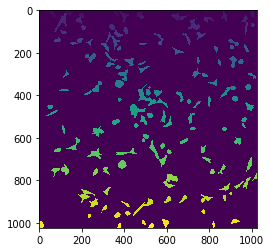

In [14]:
gt = zarr_file['ground_truth'][:]
gt = gt[:,:,1:4]
print(gt.shape)
plt.imshow(gt)
plt.show()
mask = zarr_file['mask'][:,:,0]
print(mask.shape)
print("Max masks: {} {} {}".format(zarr_file['mask'][:,:,0].max(),zarr_file['mask'][:,:,1].max(),zarr_file['mask'][:,:,2].max()))
plt.imshow(mask)
plt.show()

In [13]:
# fig=plt.figure(figsize=(10, 200))
# columns = 2
# rows = results.shape[0]
# masks = np.array(batches['gt'])
# for i in range(2):
#     for j in range(4):

#         pred = results[i][:,:,j]
#         gt = masks[i][:,:,j]
#         # img = im[i][:,:,j]
#         # fig.add_subplot(rows*4, columns, i*j+j+1)
#         # plt.imshow(img)
#         fig.add_subplot(rows*4, columns, i*8+j*2+1)
#         plt.imshow(pred)
#         fig.add_subplot(rows*4, columns, i*8+j*2+2)
#         plt.imshow(gt)
# plt.show()

### Mix data, Get the right category for each instance

In [64]:
import postproc 
from importlib import reload
reload(postproc)

<module 'postproc' from '/tf/notebooks/PixelWise_Cell_Classification/V2/unet/postproc.py'>

(1024, 1024)
[0. 1. 2. 3.]


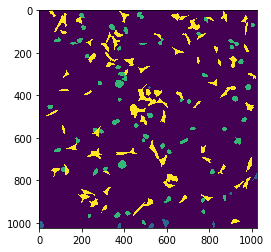

In [20]:
gt_sum = postproc.mix_channels(gt)
print(gt_sum.shape)
print(np.unique(gt_sum))
plt.imshow(gt_sum)


In [63]:
cat = postproc.get_prob_categories_per_imstance(mask,max_pred,90)
cat

Time: 3.105971097946167 seconds


{3: 762, 0: 9, 2: 11}

In [65]:
cat = postproc.get_prob_categories_per_imstance_v2(mask,max_pred,90)
cat

Time: 0.0397188663482666 seconds


{0: 0.012738853503184714, 2: 0.015286624203821656, 3: 0.9719745222929936}

[0. 1. 3. 4.]


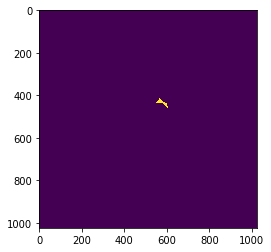

In [45]:
print(np.unique(current_image))
plt.imshow(current_image)

In [50]:
unique_elements-1

array([-1.,  0.,  2.,  3.])

In [48]:
counts_elements

array([1047791,      10,      12,     763])

In [49]:
unique_elements+1

array([1., 2., 4., 5.])